In [1]:
import psutil

def get_free_memory():
    memory = psutil.virtual_memory()
    return memory.available / (1024.0 ** 3)  # Convert bytes to gigabytes

print(f"Free CPU Memory: {get_free_memory():.2f} GB")

Free CPU Memory: 662.99 GB


In [2]:
import torch
torch.backends.cuda.matmul.allow_tf32 = True
from datasets import Dataset
import os

In [3]:
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.pre_tokenizers import WhitespaceSplit

tokenizer = Tokenizer(WordLevel(unk_token="[UNK]"))
tokenizer.pre_tokenizer = WhitespaceSplit()

In [4]:
tokenizer_path = "WordLevel_tokenizer_trained_InterPro.json"
tokenizer = tokenizer.from_file(tokenizer_path)
tokenizer.enable_truncation(512)

In [5]:
tokenizer.get_vocab_size()


544998

In [6]:
test = tokenizer.encode("WP_265490204 WP_206642677 WP_053312998 WP_251959347 WP_000076573 WP_227526754 WP_218401808 WP_106925592")
test.ids

[1, 2966, 754, 2545, 196, 9231, 2817, 7418, 2526, 2]

In [7]:
import csv

defense_ips = []
directory = "/home/toibazd/Secretion_InterPros/"
file_list = os.listdir(directory)

for file in file_list:
    print(file)
    file_path = os.path.join(directory, file)
    with open(file_path, 'r', newline='') as infile:
        reader = csv.reader(infile, delimiter = "\t")
        next(reader)
        for row in reader:
            ip = row[0]
            defense_ips.append(ip)

secretion_IP.tsv


In [8]:
print("Secretion IPs number: ", len(defense_ips))

Secretion IPs number:  164


In [9]:
from collections import defaultdict
import csv
from tqdm.auto import tqdm
import numpy as np

data_dict = defaultdict(list)

with open("/home/toibazd/Prot2IP.tsv", "r") as tsvfile:
    reader = csv.reader(tsvfile, delimiter = "\t")
    for row in tqdm(reader):
        key = row[0].split("prot_")[1].split(".")[0]
        iprs = eval(row[1])

        # Save only if there are filtered InterPro IDs
        for ip in iprs:
            if ip in defense_ips:
                data_dict[key].append(ip)


0it [00:00, ?it/s]

In [10]:
unique_defense = set()

# Iterate through each value list in the dictionary and add its elements to the set
for value_list in data_dict.values():
    unique_defense.update(value_list)

# Convert the set to a list if needed
unique_defense = list(unique_defense)

In [11]:
len(unique_defense)

156

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
enc = MultiLabelBinarizer()
one_hot_encoded = enc.fit_transform(data_dict.values())
one_hot_encoded_dict = {key: value for key, value in zip(data_dict.keys(), one_hot_encoded)}

print(len(one_hot_encoded_dict.keys()))

4161


In [13]:
one_hot_encoded.shape

(4161, 156)

In [14]:
# import os
# import random
# from tqdm import tqdm
# from concurrent.futures import ThreadPoolExecutor

# directory = '/ibex/user/toibazd/InterPro_annotated_genomes/'
# one_hot_encoded_sentences = {}

# sentence_length = 40
# sentences_per_IP = 600

# # Set random seed for reproducibility
# random.seed(42)

# # Randomly choose 1000 files with seed 42
# selected_files = os.listdir(directory)


# # Define a function to process a file
# def process_file(filename, IP):
#     sentences = []

#     filepath = os.path.join(directory, filename)

#     with open(filepath, 'r') as file:
#         content = file.read()
#         words = content.strip().split()

#         # Check if the key is in the file
#         for i in range(19, len(words)-20):
#             # Shuffle the indices of the words containing the key
#             if IP in data_dict[words[i]]:
#                 if len(words) - i >= 21:
#                     sentence = " ".join(words[i - 19:i + sentence_length - 19])
#                     sentences.append(sentence)
#     return sentences


# # Iterate over keys
# for IP in tqdm(unique_defense):
#     one_hot_encoded_sentences[IP] = []
#     sentences_count = 0

#     # Use ThreadPoolExecutor for concurrent processing
#     with ThreadPoolExecutor(max_workers=16) as executor:
#         futures = [executor.submit(process_file, filename, IP) for filename in selected_files]
#         for future in futures:
#             sentences = future.result()
#             one_hot_encoded_sentences[IP].extend(sentences)
#             sentences_count += len(sentences)
#             if sentences_count >= sentences_per_IP:
#                 break

#     # Break if the required number of sentences per key is reached


In [15]:
# for key, values in one_hot_encoded_sentences.items():
#     print(len(values))

In [16]:
# import json

# with open('BERT_sanity_check_secretion_DNN_senteces.json', 'w') as f:
#     json.dump(one_hot_encoded_sentences, f)

In [17]:
import json
with open('BERT_sanity_check_secretion_DNN_senteces.json', "r") as f:
    one_hot_encoded_sentences = json.load(f)

In [18]:
for key, value in one_hot_encoded_sentences.items():
    print(key, end=" ")
    print(len(value))

IPR010263 100
IPR048130 101
IPR006533 102
IPR032389 100
IPR025955 100
IPR012842 100
IPR001639 100
IPR018920 100
IPR017847 102
IPR009371 100
IPR035576 100
IPR013391 100
IPR002010 102
IPR010586 100
IPR017737 100
IPR039366 100
IPR003895 100
IPR010130 101
IPR034026 100
IPR027282 100
IPR009211 100
IPR047659 90
IPR009863 100
IPR003283 100
IPR013369 100
IPR009929 100
IPR021545 100
IPR005714 100
IPR008312 102
IPR034756 100
IPR011850 100
IPR031758 101
IPR025292 100
IPR008514 100
IPR023835 100
IPR010290 100
IPR021368 100
IPR027628 100
IPR022250 100
IPR023834 103
IPR005696 100
IPR049928 100
IPR022792 100
IPR047695 100
IPR004683 100
IPR010128 103
IPR010129 101
IPR026264 100
IPR023787 100
IPR017739 100
IPR019861 110
IPR011841 100
IPR017740 100
IPR018893 100
IPR007606 104
IPR006304 101
IPR017738 100
IPR013363 100
IPR049875 100
IPR049801 16
IPR013365 100
IPR005838 101
IPR005415 100
IPR010132 100
IPR043993 101
IPR017750 100
IPR017735 100
IPR021055 100
IPR005628 100
IPR013388 100
IPR017033 100
IPR00781

In [19]:
one_hot_encoded_sentences = {key: value for key, value in one_hot_encoded_sentences.items() if value}
len(one_hot_encoded_sentences)

156

In [20]:
matching_string = one_hot_encoded_sentences.values()
len(matching_string)

156

In [21]:
matching_string = [item for sublist in matching_string for item in sublist]
len(matching_string)

15270

In [22]:
count= 0
for string in matching_string:
    words = string.split(" ")
    if not words[19] in data_dict.keys():
        print("False")
    else:
        count+=1
print(count)

15270


In [23]:
from transformers import BertModel

# Check if CUDA is available and choose device accordingly
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_path = "/home/toibazd/Data/BERT/BERT_context_pretrained_InterPro_final"

model = BertModel.from_pretrained(model_path).cuda()
model.pooler = None
model.eval()

[2024-03-11 15:19:04,526] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


Some weights of BertModel were not initialized from the model checkpoint at /home/toibazd/Data/BERT/BERT_context_pretrained_InterPro_final and are newly initialized: ['bert.pooler.dense.weight', 'bert.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(544998, 256, padding_idx=0)
    (position_embeddings): Embedding(512, 256)
    (token_type_embeddings): Embedding(2, 256)
    (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=256, out_features=256, bias=True)
            (key): Linear(in_features=256, out_features=256, bias=True)
            (value): Linear(in_features=256, out_features=256, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=256, out_features=256, bias=True)
            (LayerNorm): LayerNorm((256,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
         

In [24]:
print(one_hot_encoded[1].shape)

(156,)


In [25]:
batch_size = 256 # Define your batch size
embeddings = []
labels = []


for i in tqdm(range(0, len(matching_string), batch_size)):
    batch_sentences = matching_string[i:i+batch_size]

    batch_inputs = tokenizer.encode_batch(batch_sentences)
    input_ids_list = []
    attention_mask_list = []

    for encoding in batch_inputs:
        input_ids_list.append(encoding.ids)
        attention_mask_list.append(encoding.attention_mask)

    # Convert lists to tensors and move to device
    input_ids = torch.tensor(input_ids_list).cuda()
    attention_mask = torch.tensor(attention_mask_list).cuda()

    with torch.inference_mode():
        outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True)
    hidden_states = outputs.last_hidden_state
    relevant_hidden_states = hidden_states[:, 20, :]  # Extract the 20th token's hidden state
    
    for j in range(len(batch_sentences)):
        embeddings.append(relevant_hidden_states[j].cpu())
        indicator = batch_sentences[j].split()[19]
        labels.append(one_hot_encoded_dict[indicator])


  0%|          | 0/60 [00:00<?, ?it/s]

In [26]:
def calculate_pos_weights(class_counts):
    pos_weights = np.ones_like(class_counts)
    
    neg_counts = [len(embeddings)-pos_count for pos_count in class_counts]
    for cdx, (pos_count, neg_count) in enumerate(zip(class_counts,  neg_counts)):
        pos_weights[cdx] = neg_count / (pos_count + 1e-5)

    return torch.as_tensor(pos_weights, dtype=torch.float)
class_counts = np.array(labels).sum(axis=0)
pos_weights = calculate_pos_weights(class_counts) 

In [27]:
pos_weights

tensor([ 76., 118., 151.,  74.,  74.,  76., 151.,  95., 151., 151., 151., 151.,
        151., 151., 150.,  83., 151.,  49., 151., 151.,  75., 123.,  74.,  49.,
        137., 109., 151., 127.,  73., 150., 151., 145., 151., 151., 150., 151.,
        148., 150., 151., 139., 151., 151., 151., 151., 151., 151., 151.,  93.,
        151., 147., 150., 150., 151., 150., 151., 151., 151., 136., 151., 125.,
        151.,  83., 151., 151., 151., 151.,  56., 147., 151., 151., 151., 151.,
        151., 151., 151., 151., 145.,  73.,  92., 151., 151., 151., 151., 151.,
        151., 117., 103., 151., 151., 151.,  92., 151., 151., 151., 131., 151.,
        151., 151., 151., 140., 151., 151.,  74., 237., 151., 151.,  75.,  75.,
        137., 151.,  75., 151., 151., 151., 148., 151., 726., 150., 151.,  75.,
        151., 147., 151., 151., 151., 151.,  82., 151., 151., 151., 245., 187.,
        237., 151., 150., 151., 150., 151.,  79., 151., 151., 151., 151., 150.,
        150., 168., 130., 151., 145., 15

In [28]:
import random

random.seed(42)

combined = list(zip(embeddings, labels))

random.shuffle(combined)

embeddings, labels = zip(*combined)


In [29]:
model.to("cpu")
torch.cuda.empty_cache()

In [30]:
import torch.nn as nn

class Classification_V0(nn.Module):
    def __init__(self, input_dim, first_hidden, second_hidden, last_hidden, output_dim, dropout_prob):
        super(Classification_V0, self).__init__()
        self.fc1 = nn.Linear(input_dim, first_hidden)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(first_hidden, second_hidden)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(second_hidden, last_hidden)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(last_hidden, output_dim)
        
        self.dropout = nn.Dropout(dropout_prob)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.dropout(x)
        x = self.fc4(x)
        return x

input_dim = 256
first_hidden = 128
second_hidden = 64
last_hidden = 32
output_dim = 156
dropout_prob = 0.25

clf_model = Classification_V0(input_dim, first_hidden, second_hidden, last_hidden, output_dim, dropout_prob)


In [31]:
from torch.utils.data import DataLoader, TensorDataset
import torch.optim.lr_scheduler as lr_scheduler

batch_size = 128
def data_generator(embeddings, labels, batch_size):
    num_samples = len(embeddings)
    for i in range(0, num_samples, batch_size):
        batch_embeddings = embeddings[i:i+batch_size]
        batch_labels = labels[i:i+batch_size]
        yield batch_embeddings, batch_labels


optimizer = torch.optim.Adam(clf_model.parameters(), lr=0.001)
scheduler = lr_scheduler.StepLR(optimizer=optimizer, step_size=10, gamma=0.05)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weights)

In [32]:
import numpy as np

num_epochs = 40
epoch_loss = []
for epoch in range(num_epochs):
    print(f"Epoch {epoch+1}/{num_epochs}:")
    
    # Initialize data generator
    generator = data_generator(embeddings, labels, batch_size)
    train_loss = 0
    # Iterate over batches
    for batch_embeddings, batch_labels in tqdm(generator, desc="Training Batches", leave=False):
        
        optimizer.zero_grad()
        
        # Convert data to tensors

        batch_embeddings_tensor = torch.stack(batch_embeddings)
        batch_labels = np.array(batch_labels)
        batch_labels_tensor = torch.tensor(batch_labels, dtype = torch.float32)
        
        outputs = clf_model(batch_embeddings_tensor)
        
        loss = criterion(outputs, batch_labels_tensor)
        train_loss+=loss.item()
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
    scheduler.step()
    epoch_loss.append(train_loss/(len(embeddings)/batch_size))
    print(train_loss/(len(embeddings)/batch_size))
print("Training finished.")

Epoch 1/40:


Training Batches: 0it [00:00, ?it/s]

1.3080211576950183
Epoch 2/40:


Training Batches: 0it [00:00, ?it/s]

1.00762437022271
Epoch 3/40:


Training Batches: 0it [00:00, ?it/s]

0.8280073769200293
Epoch 4/40:


Training Batches: 0it [00:00, ?it/s]

0.7333212671985638
Epoch 5/40:


Training Batches: 0it [00:00, ?it/s]

0.6650434592696054
Epoch 6/40:


Training Batches: 0it [00:00, ?it/s]

0.6122441717121596
Epoch 7/40:


Training Batches: 0it [00:00, ?it/s]

0.5687105322477469
Epoch 8/40:


Training Batches: 0it [00:00, ?it/s]

0.5343038315388917
Epoch 9/40:


Training Batches: 0it [00:00, ?it/s]

0.5025254262688118
Epoch 10/40:


Training Batches: 0it [00:00, ?it/s]

0.48079668455992014
Epoch 11/40:


Training Batches: 0it [00:00, ?it/s]

0.4571830055021974
Epoch 12/40:


Training Batches: 0it [00:00, ?it/s]

0.4550245596055666
Epoch 13/40:


Training Batches: 0it [00:00, ?it/s]

0.4518862543811811
Epoch 14/40:


Training Batches: 0it [00:00, ?it/s]

0.4484760014622057
Epoch 15/40:


Training Batches: 0it [00:00, ?it/s]

0.4464831851242255
Epoch 16/40:


Training Batches: 0it [00:00, ?it/s]

0.4439147621959194
Epoch 17/40:


Training Batches: 0it [00:00, ?it/s]

0.444399614964893
Epoch 18/40:


Training Batches: 0it [00:00, ?it/s]

0.4422941443962292
Epoch 19/40:


Training Batches: 0it [00:00, ?it/s]

0.4417995825107377
Epoch 20/40:


Training Batches: 0it [00:00, ?it/s]

0.44105428934253427
Epoch 21/40:


Training Batches: 0it [00:00, ?it/s]

0.4387637145236652
Epoch 22/40:


Training Batches: 0it [00:00, ?it/s]

0.43618308131649514
Epoch 23/40:


Training Batches: 0it [00:00, ?it/s]

0.44150600995436634
Epoch 24/40:


Training Batches: 0it [00:00, ?it/s]

0.4387739857272065
Epoch 25/40:


Training Batches: 0it [00:00, ?it/s]

0.4417186447273459
Epoch 26/40:


Training Batches: 0it [00:00, ?it/s]

0.4384843547748598
Epoch 27/40:


Training Batches: 0it [00:00, ?it/s]

0.4360452126113902
Epoch 28/40:


Training Batches: 0it [00:00, ?it/s]

0.4391513881920675
Epoch 29/40:


Training Batches: 0it [00:00, ?it/s]

0.44016430997817285
Epoch 30/40:


Training Batches: 0it [00:00, ?it/s]

0.43756610518120126
Epoch 31/40:


Training Batches: 0it [00:00, ?it/s]

0.4384138600687303
Epoch 32/40:


Training Batches: 0it [00:00, ?it/s]

0.4396808551820806
Epoch 33/40:


Training Batches: 0it [00:00, ?it/s]

0.439980664156431
Epoch 34/40:


Training Batches: 0it [00:00, ?it/s]

0.4372117093129336
Epoch 35/40:


Training Batches: 0it [00:00, ?it/s]

0.4403502596072614
Epoch 36/40:


Training Batches: 0it [00:00, ?it/s]

0.4359334999389249
Epoch 37/40:


Training Batches: 0it [00:00, ?it/s]

0.4375458852871618
Epoch 38/40:


Training Batches: 0it [00:00, ?it/s]

0.4379826336494051
Epoch 39/40:


Training Batches: 0it [00:00, ?it/s]

0.43558681765333374
Epoch 40/40:


Training Batches: 0it [00:00, ?it/s]

0.43916318827231254
Training finished.


In [33]:
# directory = '/ibex/user/toibazd/InterPro_annotated_genomes_for_testing/'
# one_hot_encoded_sentences_2 = {}

# sentence_length = 40
# sentence_per_IP = 50
# selected_files = os.listdir(directory)

# total_sentences = sum(len(sentences) for sentences in one_hot_encoded_sentences.values())

# # Iterate over keys
# for IP in tqdm(unique_defense):
#     one_hot_encoded_sentences_2[IP] = []
#     sentences_count=0
    
#     # Iterate over selected files
#     for filename in selected_files:
#         filepath = os.path.join(directory, filename)

#         with open(filepath, 'r') as file:
#             content = file.read()
#             words = content.strip().split()

#             # Check if the key is in the file
#             for i in range(19, len(words)-20):
#                 # Shuffle the indices of the words containing the key
#                 if IP in data_dict[words[i]]:
#                     if len(words) - i >= 21:
#                         sentence = " ".join(words[i - 19:i + sentence_length - 19])
#                         one_hot_encoded_sentences_2[IP].append(sentence)
#                         sentences_count += 1
#                         if sentences_count>=sentence_per_IP:
#                             break
#         if sentences_count>=sentence_per_IP:
#             break
#     print(sentences_count)
            


In [34]:
# for key, value in one_hot_encoded_sentences_2.items():
#     print(len(value))

In [35]:
# import json

# with open('BERT_sanity_check_secretion_DNN_senteces_testing.json', 'w') as f:
#     json.dump(one_hot_encoded_sentences_2, f)

In [36]:
with open('BERT_sanity_check_secretion_DNN_senteces_testing.json', "r") as f:
    test_sentences = json.load(f)

In [37]:
test_sentences = {key: value for key, value in test_sentences.items() if value}
len(test_sentences)

156

In [38]:
matching_string = test_sentences.values()
len(matching_string)

156

In [39]:
matching_string = [item for sublist in matching_string for item in sublist]
len(matching_string)

7260

In [40]:
from bertviz import model_view

batch_size = 128 # Define your batch size
# model.cuda()
test_embeddings = []
test_labels = []

# Define your data iterator in batches
for i in tqdm(range(0, len(matching_string), batch_size)):
    batch_sentences = matching_string[i:i+batch_size]
    batch_inputs = tokenizer.encode_batch(batch_sentences)
    input_ids_list = []
    attention_mask_list = []

    for encoding in batch_inputs:
        input_ids_list.append(encoding.ids)
        attention_mask_list.append(encoding.attention_mask)
    # Convert lists to tensors and move to device
    try:
        input_ids = torch.tensor(input_ids_list)
    except:
        for ins in input_ids_list:
            if len(ins)!=42:
                print(len(ins))
                print(ins)
    attention_mask = torch.tensor(attention_mask_list)

    with torch.inference_mode():
        outputs = model(input_ids, attention_mask=attention_mask, output_hidden_states=True, output_attentions = True)
    hidden_states = outputs.last_hidden_state
    attentions = outputs.attentions[-1]
    relevant_hidden_states = hidden_states[:, 20, :]  # Extract the 20th token's hidden state
#     for i in range(len(batch_sentences)):
#         if i < 20:
#             att = []
#             extracted_tensor = attentions[i, :, :, :]
#             extracted_tensor = extracted_tensor.unsqueeze(0)
#             print(extracted_tensor.shape)
#             att.append(extracted_tensor)

#             tokens = "[CLS] "+tokenizer.decode(input_ids_list[i])+" [SEP]"
#             tokens = tokens.split(" ")
#             model_view(att, tokens)
    for j in range(len(batch_sentences)):
        # Move embeddings to CPU
        test_embeddings.append(relevant_hidden_states[j].cpu())
        indicator = batch_sentences[j].split()[19]
        test_labels.append(one_hot_encoded_dict[indicator])


  0%|          | 0/57 [00:00<?, ?it/s]

In [41]:
tokenizer.decode([0,12,12,12,12,
                 ])

'WP_072018053 WP_072018053 WP_072018053 WP_072018053'

In [42]:
model.to("cpu")
torch.cuda.empty_cache()

In [43]:
clf_model.eval()

Classification_V0(
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=32, out_features=156, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)

In [64]:
generator = data_generator(test_embeddings, test_labels, batch_size)

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
all_predictions = []
all_labels = []
all_probs = []

count = 0
for batch_embeddings, batch_labels in tqdm(generator, desc="Evaluation Batches", leave=False):
    batch_embeddings_tensor = torch.stack(batch_embeddings)
    batch_labels = np.array(batch_labels)
    logits = clf_model(batch_embeddings_tensor)
    predictions = torch.sigmoid(logits)
    thresholded_predictions = (predictions > 0.9).float()
    all_predictions.append(thresholded_predictions.detach().numpy())
    all_labels.append(batch_labels)
    all_probs.append(predictions.detach().numpy())


Evaluation Batches: 0it [00:00, ?it/s]

In [65]:
len(all_predictions)

57

In [66]:
len(all_labels[0])
    

128

In [67]:
print(all_predictions[0].shape)

(128, 156)


In [68]:
print(all_labels[0].shape)

(128, 156)


In [69]:

# Concatenate predictions and labels across all batches
all_predictions = np.concatenate(all_predictions)
all_labels = np.concatenate(all_labels)
all_probs = np.concatenate(all_probs)


In [70]:
all_labels.shape

(7260, 156)

In [71]:
from sklearn import metrics
auc_scores = []

for i in range(all_labels.shape[1]):  # Iterate over each column
    y = all_labels[:, i]
    pred_y = all_probs[:, i]

    fpr, tpr, thresholds = metrics.roc_curve(y, pred_y)
    auc_score = metrics.auc(fpr, tpr)
    auc_scores.append(auc_score)

print("AUC for each column:")
for idx, score in enumerate(auc_scores):
    print(idx,": ", score)

AUC for each column:
0 :  0.9312070573067641
1 :  0.9207956723684819
2 :  0.9871123439667129
3 :  0.9670097765363127
4 :  0.9137625698324021
5 :  0.9800055865921788
6 :  0.9306768377253815
7 :  0.9946351194618418
8 :  0.9378502080443829
9 :  0.9989847434119279
10 :  0.8709375866851594
11 :  0.9982662968099861
12 :  1.0
13 :  1.0
14 :  0.9999694868238558
15 :  0.9953349790306312
16 :  0.9996393897364771
17 :  0.945113924050633
18 :  0.9130208044382802
19 :  0.9947184466019418
20 :  0.9773980446927374
21 :  0.9985906826256972
22 :  0.9591564245810056
23 :  0.92357805907173
24 :  0.9987838627201256
25 :  0.945597059407908
26 :  0.9949292649098475
27 :  0.9550694444444444
28 :  0.8817332402234637
29 :  0.9341914008321776
30 :  0.9005589459084604
31 :  0.999242718446602
32 :  0.9569098474341192
33 :  0.9006685159500694
34 :  0.9245547850208045
35 :  0.9505658807212205
36 :  0.9574618585298197
37 :  0.9145575589459084
38 :  0.9941303744798891
39 :  0.9971808472363566
40 :  0.9994020382695508

In [72]:
from sklearn import metrics

y = all_labels.flatten()
pred_y = all_probs.flatten()

fpr, tpr, thresholds = metrics.roc_curve(y, pred_y)
print(metrics.auc(fpr, tpr))

0.9803070070028221


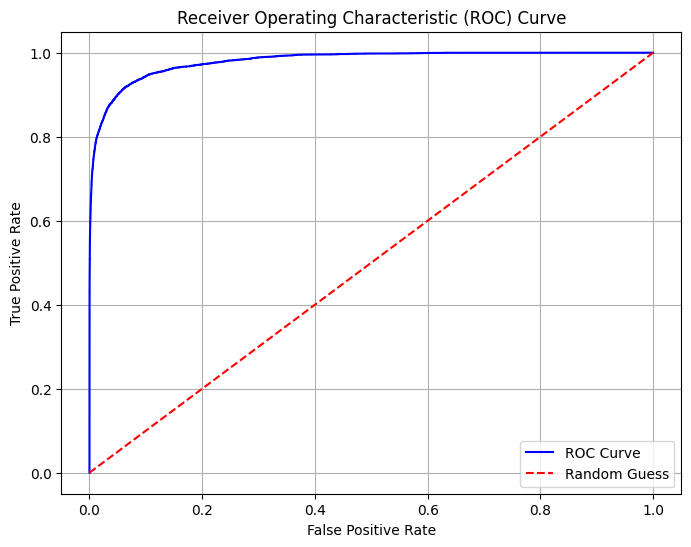

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [74]:
cl_report = multilabel_confusion_matrix(all_labels, all_predictions)
print("Classification report:")
print(len(cl_report))

Classification report:
156


In [75]:
print(cl_report[100])

[[7167   43]
 [  41    9]]


In [76]:
from sklearn.metrics import classification_report

report = classification_report(all_labels, all_predictions, zero_division=np.nan)

In [77]:
all_predictions.sum(axis=0)

array([ 71.,  48.,  80.,  82.,  51., 123.,  78.,  73.,  56.,  47.,   6.,
        70.,  45.,  42.,  50.,  80.,  59.,  74.,   8.,  70.,  77.,  56.,
        65.,  99.,  75.,  47.,  53.,  60., 154.,  15.,   1.,  77.,  64.,
        20.,   0.,  44., 109.,  18.,  45., 111.,  72.,  43., 111.,  89.,
        46.,  74.,  19.,  68.,  39.,  75.,  25.,  82.,  51.,  45.,  46.,
        35.,  14.,   0.,  46.,  63.,  28., 100.,  74.,  72.,  55.,  74.,
        95.,  42.,  92.,  55.,  83.,  45., 123.,  26.,  66.,  76.,  72.,
        84.,  99.,  76.,  54.,  72.,  89., 104.,  72., 100.,  59.,  54.,
        46.,  49., 104.,  66.,  56.,  52.,  28.,  20.,  18.,  70.,  54.,
        60.,  52.,  69., 167.,   9.,  47., 122., 121.,  90.,  31.,  38.,
       100.,  37.,  53.,  50., 105.,  23.,   1.,  66.,  42., 119.,  66.,
        40., 120.,  57.,  72.,  43.,  60.,  60.,  26.,  32.,  15.,  25.,
        17.,  51.,  64.,  22.,  76.,  36., 112.,  28.,  73.,  48.,  81.,
        50.,  15.,  41.,  77.,  86.,  74.,  47.,  5

In [78]:
print(report)

              precision    recall  f1-score   support

           0       0.70      0.51      0.59        99
           1       0.50      0.42      0.46        57
           2       0.57      0.92      0.71        50
           3       0.68      0.56      0.62       100
           4       0.92      0.47      0.62       100
           5       0.61      0.75      0.67       100
           6       0.17      0.26      0.20        50
           7       0.82      0.80      0.81        75
           8       0.38      0.42      0.40        50
           9       1.00      0.94      0.97        50
          10       0.00      0.00      0.00        50
          11       0.67      0.94      0.78        50
          12       0.98      1.00      0.99        44
          13       0.95      1.00      0.98        40
          14       0.98      0.98      0.98        50
          15       0.80      0.76      0.78        84
          16       0.76      0.90      0.83        50
          17       1.00    

In [ ]:
list(enc.classes_)[36]

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
num_classes = 83
# Compute precision, recall, and thresholds for each class
precision = dict()
recall = dict()
thresholds = dict()
average_precision = dict()

for i in range(num_classes):  # num_classes is the number of classes
    precision[i], recall[i], thresholds[i] = precision_recall_curve(all_labels[:, i], all_predictions[:, i])
    average_precision[i] = average_precision_score(all_labels[:, i], all_predictions[:, i])

# Compute micro-average precision-recall curve and AUC
precision["micro"], recall["micro"], _ = precision_recall_curve(all_labels.ravel(), all_predictions.ravel())
average_precision["micro"] = average_precision_score(all_labels, all_predictions, average="micro")

# Compute ROC curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels[:, i], all_predictions[:, i])
    roc_auc[i] = roc_auc_score(all_labels[:, i], all_predictions[:, i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(all_labels.ravel(), all_predictions.ravel())
roc_auc["micro"] = roc_auc_score(all_labels, all_predictions, average="micro")

# Split classes into groups of 10
class_groups = [list(range(i, min(i + 10, num_classes))) for i in range(0, num_classes, 10)]

# Plot Precision-Recall and ROC curves for each group
for group in class_groups:
    plt.figure(figsize=(12, 6))

    # Plot Precision-Recall curve
    plt.subplot(1, 2, 1)
    plt.step(recall['micro'], precision['micro'], where='post', label='Micro-average Precision-Recall curve (AUPR = {0:0.2f})'
                 ''.format(average_precision["micro"]))
    for i in group:
        plt.step(recall[i], precision[i], where='post', label='Precision-recall curve of class {0} (AUPR = {1:0.2f})'
                 ''.format(i, average_precision[i]))

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall curve (Classes {})'.format(group))
    plt.legend(loc="best")

    # Plot ROC curve
    plt.subplot(1, 2, 2)
    plt.plot(fpr['micro'], tpr['micro'], label='Micro-average ROC curve (AUC = {0:0.2f})'
                 ''.format(roc_auc["micro"]))
    for i in group:
        plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (AUC = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Classes {})'.format(group))
    plt.legend(loc="best")

    plt.tight_layout()
    plt.show()


In [ ]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))